In [ ]:
//@version=5
indicator("4CCP + 4CRP Patterns", overlay=true, max_boxes_count=500, max_lines_count=500, max_labels_count=500)

// === Restrict to 1-minute timeframe ===
is_1m = timeframe.period == "1"

// === Candle Data ===
o = open
c = close

// === Helper: body top, bottom, mid ===
getBodyCoords(_o, _c) =>
    top = math.max(_o, _c)
    bot = math.min(_o, _c)
    mid = (top + bot) / 2
    [top, bot, mid]

// === Persistent arrays for drawing objects ===
var box[] boxes = array.new_box()
var line[] lines = array.new_line()
var label[] labels = array.new_label()

// === Draw helper function ===
drawBoxAndLine(idx, top, bot, mid, colorFill, labelText) =>
    x1 = idx
    x2 = x1 + 5
    bx = box.new(left=x1, right=x2, top=top, bottom=bot, bgcolor=color.new(colorFill, 70), border_color=colorFill)
    ln = line.new(x1=x1, y1=mid, x2=x2, y2=mid, color=colorFill, width=1, style=line.style_dotted)
    array.push(boxes, bx)
    array.push(lines, ln)
    txt = label.new(x=x1+2, y=mid+syminfo.mintick*20, text=labelText, style=label.style_none, textcolor=color.white, size=size.tiny)
    array.push(labels, txt)

// === === 4CCP Patterns ===
// --- T1.1 ---
t1_1 = c[3] > o[3] and c[2] < o[3] and c[1] > o[2] and c[1] < c[3] and c > c[1] and c > o[2] and c > c[3]
if is_1m and t1_1
    [top, bot, mid] = getBodyCoords(o[2], c[2])
    drawBoxAndLine(bar_index-2, top, bot, mid, color.rgb(0,192,255), "4CCP-T1.1")

// --- T1.2 ---
t1_2 = c[3] > o[3] and c[2] < o[3] and c[1] > c[2] and c[1] < o[2] and c > c[1] and c > o[2] and c > c[3]
if is_1m and t1_2
    [top, bot, mid] = getBodyCoords(o[2], c[2])
    drawBoxAndLine(bar_index-2, top, bot, mid, color.rgb(255,192,0), "4CCP-T1.2")

// --- T2.1 ---
t2_1 = c[3] < o[3] and c[2] > o[3] and c[1] < o[2] and c[1] < c[3] and c < c[1] and c < o[2] and c < c[3]
if is_1m and t2_1
    [top, bot, mid] = getBodyCoords(o[2], c[2])
    drawBoxAndLine(bar_index-2, top, bot, mid, color.rgb(255,64,64), "4CCP-T2.1")

// --- T2.2 ---
t2_2 = c[3] < o[3] and c[2] > o[3] and c[1] < c[2] and c[1] > o[2] and c < c[1] and c < o[2] and c < c[3]
if is_1m and t2_2
    [top, bot, mid] = getBodyCoords(o[2], c[2])
    drawBoxAndLine(bar_index-2, top, bot, mid, color.rgb(255,128,0), "4CCP-T2.2")

// === === 4CRP Patterns (rectangle/line from 1st candle) ===
// --- 4CRP-T1.1 (bearish first candle) ---
c1_bear = c[3] < o[3]
in_range2 = math.max(o[2], c[2]) <= math.max(o[3], c[3]) and math.min(o[2], c[2]) >= math.min(o[3], c[3])
in_range3 = math.max(o[1], c[1]) <= math.max(o[3], c[3]) and math.min(o[1], c[1]) >= math.min(o[3], c[3])
in_range4 = math.max(o, c) <= math.max(o[3], c[3]) and math.min(o, c) >= math.min(o[3], c[3])
cond_4CRP_T1_1 = c1_bear and in_range2 and in_range3 and in_range4

if is_1m and cond_4CRP_T1_1
    [top, bot, mid] = getBodyCoords(o[3], c[3])  // 1st candle range
    drawBoxAndLine(bar_index-3, top, bot, mid, color.purple, "4CRP-T1.1")

// --- 4CRP-T2.1 (bullish first candle) ---
c1_bull = c[3] > o[3]
in_range2b = math.max(o[2], c[2]) <= math.max(o[3], c[3]) and math.min(o[2], c[2]) >= math.min(o[3], c[3])
in_range3b = math.max(o[1], c[1]) <= math.max(o[3], c[3]) and math.min(o[1], c[1]) >= math.min(o[3], c[3])
in_range4b = math.max(o, c) <= math.max(o[3], c[3]) and math.min(o, c) >= math.min(o[3], c[3])
cond_4CRP_T2_1 = c1_bull and in_range2b and in_range3b and in_range4b

if is_1m and cond_4CRP_T2_1
    [top, bot, mid] = getBodyCoords(o[3], c[3])  // 1st candle range
    drawBoxAndLine(bar_index-3, top, bot, mid, color.green, "4CRP-T2.1")

// === Optional plotshapes for reference ===
plotshape(is_1m and t1_1, text="↑T1.1", style=shape.triangleup, location=location.belowbar, color=color.rgb(0,192,255), size=size.tiny)
plotshape(is_1m and t1_2, text="↑T1.2", style=shape.triangleup, location=location.belowbar, color=color.rgb(255,192,0), size=size.tiny)
plotshape(is_1m and t2_1, text="↓T2.1", style=shape.triangledown, location=location.abovebar, color=color.rgb(255,64,64), size=size.tiny)
plotshape(is_1m and t2_2, text="↓T2.2", style=shape.triangledown, location=location.abovebar, color=color.rgb(255,128,0), size=size.tiny)
plotshape(is_1m and cond_4CRP_T1_1, text="4CRP-T1", style=shape.triangleup, location=location.belowbar, color=color.purple, size=size.tiny)
plotshape(is_1m and cond_4CRP_T2_1, text="4CRP-T2", style=shape.triangleup, location=location.belowbar, color=color.green, size=size.tiny)


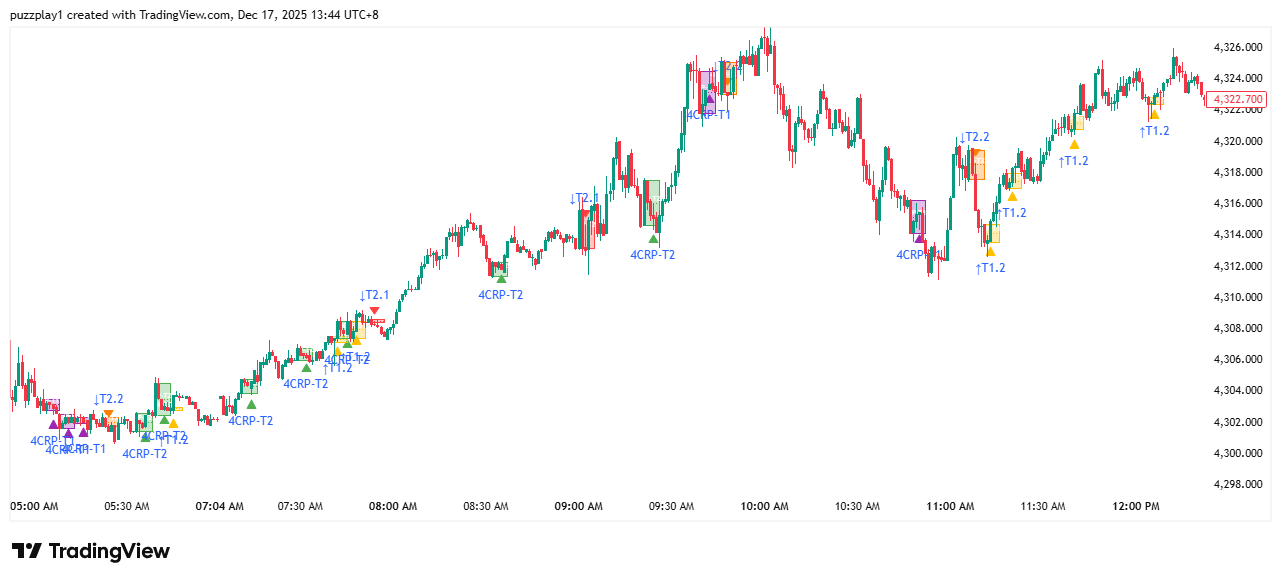